# Step 1: Data extraction

In [184]:
# tools
try:
    from bs4 import BeautifulSoup
    import pandas
    
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import numpy as np
import matplotlib.pyplot as plt
import urllib.request as url
import csv 
import time

BeautifulSoup and Pandas are already installed and imported


In [185]:

# options = webdriver.ChromeOptions()
# # options.headless = True 
# options.add_argument("--headless")
# options.page_load_strategy = 'none' 

# chrome_path = ChromeDriverManager().install() 
# chrome_service = Service(chrome_path) 

# # Connect to the URL
# browser = webdriver.Chrome(options = options, service=chrome_service)
# browser.implicitly_wait(5)

# browser.get(url)
# time.sleep(10)

# # Parse HTML and save to BeautifulSoup object
# soup = BeautifulSoup(browser.page_source, "lxml")

url = "https://en.wikipedia.org/wiki/Tropical_cyclones_in_2020?ref=pylenin"

page = requests.get(url)
print ("Webpage opened successfully...")

soup = BeautifulSoup(page.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

# lists = soup.find_all('section', class_='listing-search-item')
# print(lists)
# browser.quit()

Webpage opened successfully...
Webpage loaded and parsed successfully...


In [186]:
print(page) 

<Response [200]>


An HTTP response status code of 200 represents a successful response.

# Step 2: Data transformation and load

The caption attribute stores the headers for the tables in the page. We want to see if there any any empty caption attributes and only keep the ones that have content in them.

In [227]:
table = soup.find_all('table')
filtered_table = [table for table in table_soup if table.caption is not None]

final_table = []

for table in filtered_table:
    if table.caption is not None:
        final_table.append(table)

headers = [header.text.strip() for header in final_table[0].find_all('th')]
headers[2] = "Max wind"
headers[3] = "Pressure"
headers[5] = "Damage"
print(headers)

['Storm name', 'Dates active', 'Max wind', 'Pressure', 'Areas affected', 'Damage', 'Deaths', 'Refs']


In [207]:
raw_data = []

for i in range(12):
    table = final_table[i].find_all('tr')
    for row in table:
        data = row.find_all('td')
        final_data = [dp.text.strip() for dp in data]

        if len(final_data) == 0:
            continue
        
        raw_data.append(final_data);

print(raw_data)

[['Blake', 'January 4–11', '75 (45)', '986', 'Western Australia', 'Minor', 'None', ''], ['Claudia', 'January 4–17', '150 (90)', '963', 'Eastern Indonesia, Top End, Kimberley', 'None', 'None', ''], ['Tino', 'January 11–20', '120 (75)', '970', 'Solomon Islands, Vanuatu, Fiji, Wallis and Futuna, Samoan Islands, Tuvalu, Tonga', '$5.83\xa0million', '2', '[17]'], ['05', 'January 19–23', '55 (35)', '999', 'None', 'None', 'None', ''], ['Diane', 'January 22–26', '75 (45)', '990', 'Madagascar, Mauritius, Réunion', 'Unknown', '31', '[18]'], ['Kurumí', 'January 23–25', '65 (40)', '998', 'São Paulo, Minas Gerais, Espírito Santo, Rio de Janeiro', 'Unknown', '70', '[19]'], ['Esami', 'January 23–26', '85 (50)', '990', 'Rodrigues', 'None', 'None', ''], ['04U', 'January 23–30', 'Unspecified', '998', 'Northern Territory, Queensland', 'None', 'None', ''], ['05F', 'January 24–26', 'Unspecified', '1003', 'Samoan Islands', 'None', 'None', ''], ['TL', 'January 31 – February 4', 'Unspecified', '1007', 'Christm

### Create the csv file

In [208]:
with open('world_cyclones.csv', 'w', newline="") as output:
    writer = csv.writer(output)
    writer.writerow(headers)
    writer.writerows(raw_data)

### Load the csv file we created

In [209]:
df = pd.read_csv("world_cyclones.csv")
df.head(10)

,Storm name,Dates active,Max wind,Pressure,Areas affected,Damage,Deaths,Refs
0,Blake,January 4–11,75 (45),986,Western Australia,Minor,None,NaN
1,Claudia,January 4–17,150 (90),963,"Eastern Indonesia, Top End, Kimberley",None,None,NaN
2,Tino,January 11–20,120 (75),970,"Solomon Islands, Vanuatu, Fiji, Wallis and Fut...",$5.83 million,2,[17]
3,05,January 19–23,55 (35),999,None,None,None,NaN
4,Diane,January 22–26,75 (45),990,"Madagascar, Mauritius, Réunion",Unknown,31,[18]
5,Kurumí,January 23–25,65 (40),998,"São Paulo, Minas Gerais, Espírito Santo, Rio d...",Unknown,70,[19]
6,Esami,January 23–26,85 (50),990,Rodrigues,None,None,NaN
7,04U,January 23–30,Unspecified,998,"Northern Territory, Queensland",None,None,NaN
8,05F,January 24–26,Unspecified,1003,Samoan Islands,None,None,NaN
9,TL,January 31 – February 4,Unspecified,1007,"Christmas Island, Cocos Islands",None,None,NaN


#### Duplication Checks and Cleaning

In [195]:
number_of_duplicates = df.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Delete duplicate rows
df = df.drop_duplicates()

number_of_duplicates = df.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 0
 Number of duplicates after removing : 0


#### Inspecting data and checking noisy entries

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Storm name          140 non-null    object
 1   Dates active        140 non-null    object
 2   Max windkm/h (mph)  140 non-null    object
 3   Pressure(hPa)       140 non-null    int64 
 4   Areas affected      140 non-null    object
 5   Damage(USD)         140 non-null    object
 6   Deaths              140 non-null    object
 7   Refs                71 non-null     object
dtypes: int64(1), object(7)
memory usage: 9.8+ KB


We see that there are 140 rows overall and 140 non-null entries. We are good to go!

# Step 3: Analysis: Summary and visualizations

In [211]:
pressure = df['Pressure']
pressure.describe()

count     140.000000
mean      984.907143
std        24.003866
min       905.000000
25%       975.000000
50%       994.000000
75%      1001.000000
max      1012.000000
Name: Pressure, dtype: float64

<AxesSubplot:>

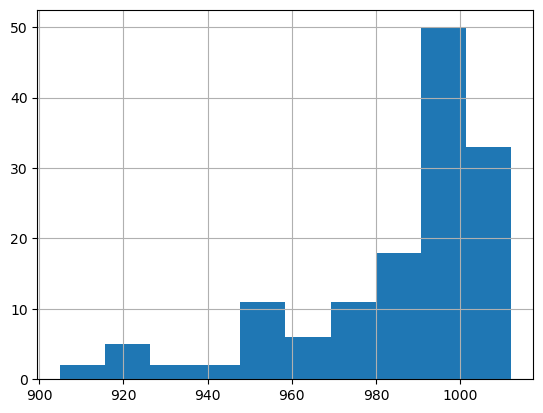

In [212]:
pressure.hist(bins=10)

**Insights:** 
Based off this histogram we can see that the pressure of the cyclones generally fall between 990 to 1010 hPa.

Text(0.5, 1.0, 'Cyclone pressure for 5 random days 2020')

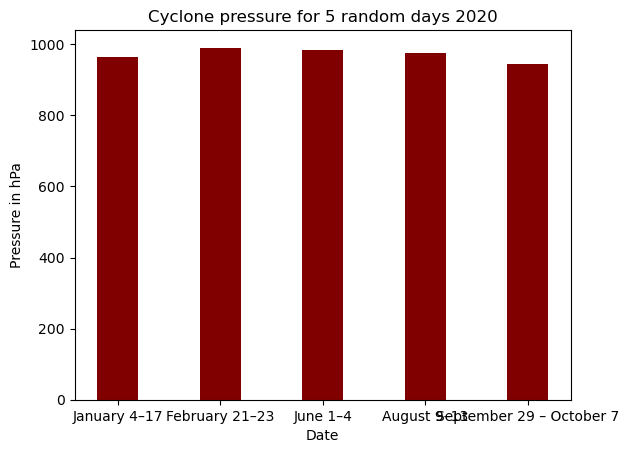

In [222]:
five_random_days = [1,20,40,60,95]

date_column = df["Dates active"]
temp_column = df["Pressure"]

selected_dates = []
selected_temps = []

for day_id in five_random_days:
    selected_dates.append(date_column[day_id])
    selected_temps.append(temp_column[day_id])
    

# Now plot our bar graph
plt.bar(selected_dates, selected_temps, color ='maroon', width = 0.4)

# Now add axis labels with units
plt.xlabel("Date")
plt.ylabel("Pressure in hPa")

# We can add a title too
plt.title("Cyclone pressure for 5 random days 2020")

**Insights:** 
Based off this histogram we can see that the pressure of the cyclones on 5 random days through out the year range from 950 to 980 hPa which is not far from the mean of 984.9.

Text(0.5, 1.0, 'Max winds of cyclones in 2020')

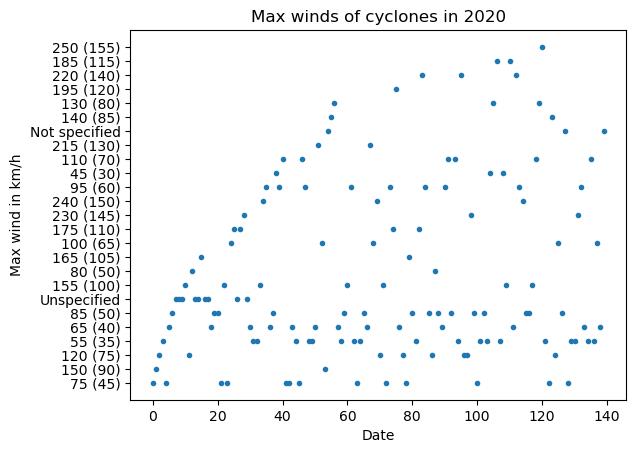

In [225]:
day_ids = range(len(date_column)) # creates a variable 0,1,2...total_days
temp_column = df["Max wind"]

plt.scatter(day_ids,temp_column, marker='.')

plt.xlabel("Date")
plt.ylabel("Max wind in km/h")

plt.title("Max winds of cyclones in 2020")

**Insights:** 
Based off this scatter plot we can see that the max winds of the cyclone throughout 2020 gradually increased as the year progressed reaching 250 km/h.

### Summary
Overall, the data quite surprised me as cyclone season usually ranges from November to April so I would have expected higher values during those times. The most important data points would be the numerical values such as the pressure and max winds.